In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum

In [38]:
a = 1 #lattice constant
# lattice vectors
a1 = np.array([a])
U = 1
lattice = pb.Lattice(a1=a1)
lattice.add_sublattices(
    ('A', np.array([0, 0]), -U), ('B', np.array([a/2, a*sqrt(3)/2]), U))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -0.9
tprime = -0.6

lattice.add_hoppings(
    ([1], 'A', 'A', tprime),
    ([1], 'B', 'B', tprime),
    ([0], 'A', 'B', t),
    ([-1], 'A', 'B', t),
)

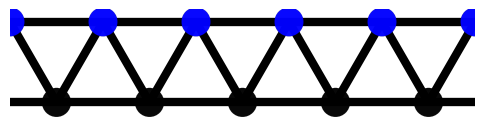

In [39]:
plt.figure(figsize=(6, 6))
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2.5, 2.5)
plt.ylim(-0.2,1 );

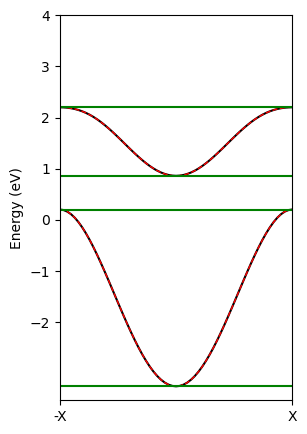

In [48]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(model)
X = np.array([np.pi/a])
bands = solver.calc_bands(-X, X)
energies = bands.energy
analytic_energies_positive = 2*tprime*np.cos(k_path)+sqrt(U**2+2*t**2*(1+np.cos(k_path)))
analytic_energies_negative = 2*tprime*np.cos(k_path)-sqrt(U**2+2*t**2*(1+np.cos(k_path)))

k_path = bands.k_path
plt.plot(energies, color="black")
plt.plot(analytic_energies_positive, color="red", linestyle="dashed", linewidth=1)
plt.plot(analytic_energies_negative, color="red", linestyle="dashed", linewidth=1)

plt.xticks(k_path.point_indices, ['-X', 'X'])
plt.hlines([-2*tprime+np.abs(U)], 0, len(k_path)-1, color="green")
plt.hlines([-2*tprime-np.abs(U)], 0, len(k_path)-1, color="green")

plt.hlines([2*tprime+sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")
plt.hlines([2*tprime-sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")

plt.xlim(0, len(k_path)-1)
#plt.ylim(-2, 4)
plt.yticks(np.linspace(-2, 4, num=7));
plt.ylabel("Energy (eV)");

# Effective masses for tprime=0

In [81]:
a = 1 #lattice constant
# lattice vectors
a1 = np.array([a])
U = 3
lattice = pb.Lattice(a1=a1)
lattice.add_sublattices(
    ('A', np.array([0, 0]), -U), ('B', np.array([a/2, a*sqrt(3)/2]), U))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1
tprime = 0

lattice.add_hoppings(
    #([1], 'A', 'A', tprime),
    #([1], 'B', 'B', tprime),
    ([0], 'A', 'B', t),
    ([-1], 'A', 'B', t),
)

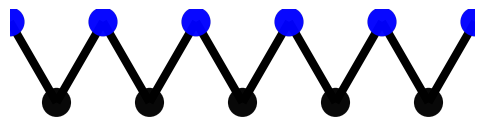

In [82]:
plt.figure(figsize=(6, 6))
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)
model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2.5, 2.5)
plt.ylim(-0.2,1 );

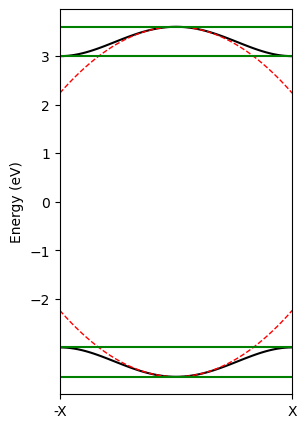

In [83]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(model)
X = np.array([np.pi/a])
bands = solver.calc_bands(-X, X)
k_path = bands.k_path
energies = bands.energy
analytic_energies_positive = sqrt(U**2+4*t**2)-t**2/2/sqrt(U**2+4*t**2)*k_path**2
analytic_energies_negative = -sqrt(U**2+4*t**2)+t**2/2/sqrt(U**2+4*t**2)*k_path**2

plt.plot(energies, color="black")
plt.plot(analytic_energies_positive, color="red", linestyle="dashed", linewidth=1)
plt.plot(analytic_energies_negative, color="red", linestyle="dashed", linewidth=1)

plt.xticks(k_path.point_indices, ['-X', 'X'])
plt.hlines([-2*tprime+np.abs(U)], 0, len(k_path)-1, color="green")
plt.hlines([-2*tprime-np.abs(U)], 0, len(k_path)-1, color="green")

plt.hlines([2*tprime+sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")
plt.hlines([2*tprime-sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")

plt.xlim(0, len(k_path)-1)
#plt.ylim(-2, 4)
plt.yticks(np.linspace(-2, 3, num=6));
plt.ylabel("Energy (eV)");

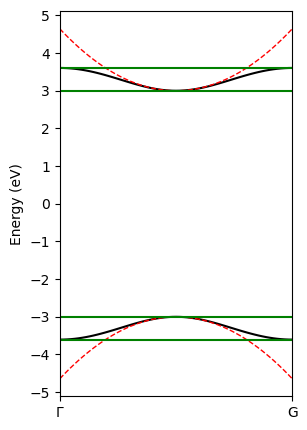

In [86]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(model)
Gamma = np.array([0])
Gamma2 = np.array([2*np.pi])
bands = solver.calc_bands(Gamma, Gamma2)
k_path = bands.k_path
energies = bands.energy
analytic_energies_positive = np.abs(U)+t**2/2/np.abs(U)*(k_path-np.pi)**2
analytic_energies_negative = -np.abs(U)-t**2/2/np.abs(U)*(k_path-np.pi)**2

plt.plot(energies, color="black")
plt.plot(analytic_energies_positive, color="red", linestyle="dashed", linewidth=1)
plt.plot(analytic_energies_negative, color="red", linestyle="dashed", linewidth=1)

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'G'])
plt.hlines([-2*tprime+np.abs(U)], 0, len(k_path)-1, color="green")
plt.hlines([-2*tprime-np.abs(U)], 0, len(k_path)-1, color="green")

plt.hlines([2*tprime+sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")
plt.hlines([2*tprime-sqrt(U**2+4*t**2)], 0, len(k_path)-1, color="green")

plt.xlim(0, len(k_path)-1)
#plt.ylim(-3, 3)
plt.yticks(np.linspace(-5, 5, num=11));
plt.ylabel("Energy (eV)");